<img src="https://www.dataiku.com/static/img/learn/guide/getting-started/getting-started-with-python/logo-stack-python.png" style="width: 700px;">
<h1 align=center style="color: #005496; font-size: 4.2em;">Machine Learning</h1>
<h2 align=center>Laboratory on Numpy / Matplotlib / Pandas / Scikit-learn</h2>

## Introduction

Python has become the de-facto standard programming language for data analytics in the past few years. Python's success is due to several factors, but one primary reason has been the availability of robust, open-source libraries for scientific computation, such as Numpy, Scipy and Matplotlib. Python is also the most popular programming language for machine learning, thanks to libraries such as Scikit-learn, TensorFlow and PyTorch.

This lecture will explore the basics of Numpy, Matplotlib and Scikit-learn. The first is a library for data manipulation through the powerful `numpy.ndarray` data structure; the second is helpful for graphical visualization and plotting; the third is a general-purpose library for machine learning, containing dozens of algorithms for classification, regression, clustering and others.

In this lecture, we assume familiarity with the Python programming language. If you are unfamiliar with the language, we advise you to look it up before going over to the next sections. Here are some useful links to learn about Python:
- https://docs.python.org/3/tutorial/introduction.html
- https://www.learnpython.org/
- http://www.scipy-lectures.org/

If you have never seen a page like this, it is a **Jupyter Notebook**. Here one can easily embed Python code and run it on the fly. You can run the code in a cell by selecting the cell and clicking the *Run* button (top). You can do the same using the **SHIFT+Enter** shortcut. You can modify the existing cells, run them, and save your changes.

## Requirements

1. Python (preferably version > 3.7): https://www.python.org/downloads/
2. Numpy, Scipy and Matplotlib: https://www.scipy.org/install.html
3. Scikit-learn: http://scikit-learn.org/stable/install.html
4. Pandas: https://pandas.pydata.org/docs/getting_started/index.html

## References

- https://docs.scipy.org/doc/numpy/
- https://docs.scipy.org/doc/scipy/reference/
- https://matplotlib.org/users/index.html
- http://scikit-learn.org/stable/documentation.html



We now define a couple of functions which will be useful to plot the decision function of a trained ML model

In [19]:
from utils.lib import plot_data
from utils.lib import plot_decision_surface
from utils.lib import plot_3D_decision_surface
from utils.lib import plot_svm_margin

In [20]:
# Disable warnings within the notebook
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
Let's now dive into the real **Machine Learning** part. *Scikit-learn* is the most widespread library for Machine Learning in use nowadays, and most of its fame is due to its extreme simplicity. With Scikit-learn, it is possible to manage datasets easily and train a wide range of classifiers out-of-the-box. It is also helpful for several other Machine Learning tasks, such as regression, clustering, dimensionality reduction, and model selection.

# Lecture Summary

1. Classification
    1. SVM (Linear, Feature Mapping, Kernel)
    2. Decision Tree
    3. Real Case: Glass Identification
2. K-Fold Cross Validation
3. Clustering
    1. K-means
4. Dimensionality Reduction
    1. PCA

## Generating a suitable dataset

We will first generate a synthetic dataset which we will use for the experiments. We will restrict ourselves to a simple case, in which each example has 2-components.

$$
\mathbf{x} = \{ x_0, x_1\} \qquad x_0, x_1 \in \mathcal{N}(0,1) \qquad \mathbf{X} = \{\mathbf{x}_i\}^{N}_{i=0} \\[1.5ex]
$$
Then, we assume that each example $\mathbf{x}$ is part of the dataset if and only if it satisfies the following condition (remember that $x^2 +y^2 = r^2$ is the equation describing a circle centered at the origin).
$$
\mathbf{x} \in \mathbf{X} \quad \Leftrightarrow \quad (x_0^2 + x_1^2) > 1 \;\; \vee \;\; (x_0^2 + x_1^2) \leq 0.25 \\[1.5ex]
$$

Lastly, we need to classify these points. We assume that the classification function has the following form:

$$
y =
\begin{cases} 
1 \quad x_0^2 + x_1^2 > 1\\
0 \quad x_0^2 + x_1^2 \leq 0.25
\end{cases}$$

We can generate a dataset and plot the correspoding results.

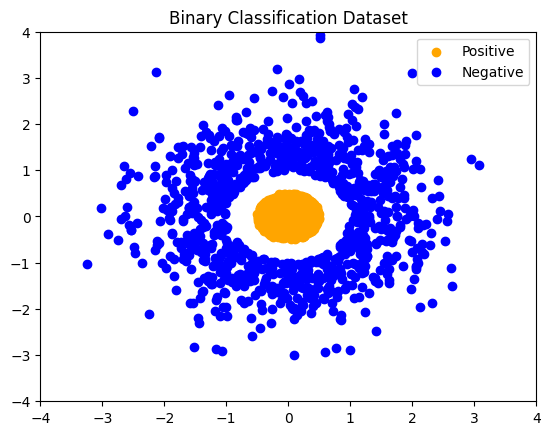

In [21]:
# Generate a synthetic dataset by using the utils.lib.generate_data function
# Plot the generated data by ysing the utils.lib.plot_data function
from utils.lib import generate_data

X, Y = generate_data(0, 1, 2000)

plot_data(X, Y)

# Supervised Learning

## Support Vector Machines

In [22]:
# Perform the data splitting between train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Train dataset length: {X_train.shape}")
print(f"Test dataset length: {X_test.shape}")

Train dataset length: (1600, 2)
Test dataset length: (400, 2)


## SVM with Linear Kernel

In [23]:
# Train a linear SVM and then perform inference over the test set
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Great! We trained our first model. Let us evaluate the model over the test set. As a simple evaluation metric, we will use the accuracy. Remember that the accuracy metric is defined as:

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [24]:
# Compute the accuracy over the test set
from sklearn.metrics import accuracy_score

print(f"Accuracy over the test set: {accuracy_score(y_test, y_pred)}")

Accuracy over the test set: 0.6575


As we can see, the performances are not that impressive. For such a simple dataset we would expect to hit more than 90% accuracy. Something is clearly wrong. Let us have a look at the shape of the learned decision function.

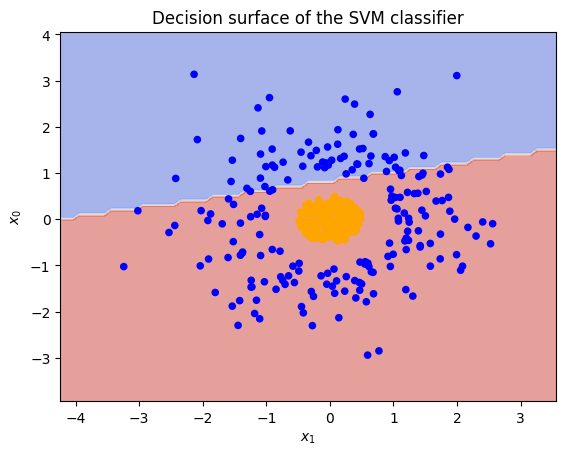

In [25]:
# Plot the decision surface of the SVM using the utils.lib.plot_decision_surface
plot_decision_surface(X_test, y_test, clf)

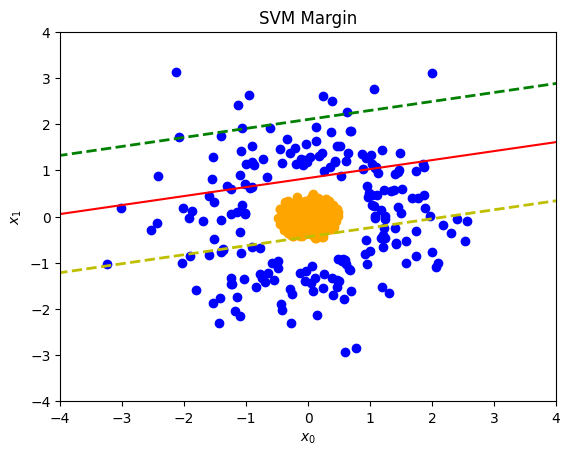

In [26]:
# Plot the margin of the SVM using the utils.lib.plot_svm_margin
plot_svm_margin(X_test, y_test, clf)

Clearly, the decision function is linear, while the data presents a non-linearity. Therefore, we need to employ a different kind of kernel to capture this feature. 

## Feature mapping
Non-linearly separable problems need a higher expressive power. We employ a homogeneus feature mapping $\phi: \mathcal{X} \rightarrow \mathcal{H}$ which maps each example $\mathbf{x} \in \mathcal{X}$ in a higher-dimensional space $\mathcal{H}$. The examples must be (approximately) linearly separable in the mapped space.

$$
    \phi : \mathbf{R}^2 \rightarrow \mathbf{R}^3\\
    \mathbf{x} = \binom{x_0}{x_1} \qquad \phi(\mathbf{x}) = \left(\begin{gather}
    x_0^2 \\
    x_0 \cdot x_1 \\
    x_1^2
  \end{gather}\right)
$$

In [27]:
# Define a function which converts a 2D example in its 3D mapping
# Create a new variable called X3d which contains the mapped dataset
def feature_map(X):
    x0, x1 = X
    return [x0**2, x0*x1, x1**2]

X3d = np.array([feature_map(e) for e in X])

In [28]:
# Perform the train/test split and save the new dataset
X3d_train, X3d_test, y3d_train, y3d_test = train_test_split(X3d, Y, test_size=0.2, random_state=42)

### SVM with Linear Kernel (Feature Mapping)

In [29]:
# Train a linear SVM and perform inference with the mapped data
clf = SVC(kernel='linear')
clf.fit(X3d_train, y3d_train)

y3d_pred = clf.predict(X3d_test)

In [30]:
# Compute the accuracy
accuracy_score(y3d_test, y3d_pred)

1.0

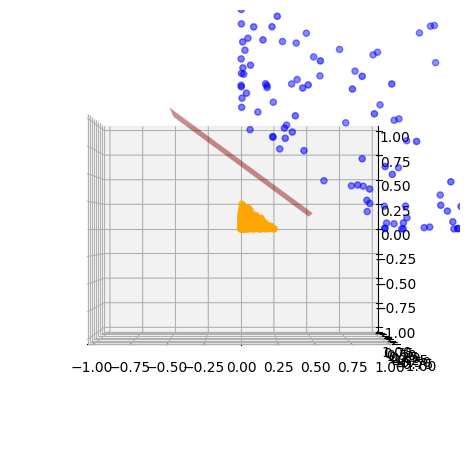

In [31]:
# Print the 3D decision surface of the SVM using utils.lib.plot_3D_decision_surface
plot_3D_decision_surface(X3d_test, y3d_test, clf)

## SVM with Polynomial Kernel

Devising a feature mapping $\phi$ is a nice idea. However, it can be time-consuming and expensive to compute if we are dealing with a high-dimensional polynomial mapping. We can use the **kernel trick** to avoid computing explicity the mapping.

$$
k(\mathbf{x}, \mathbf{x'}) = \phi(\mathbf{x}) \phi(\mathbf{x}') \qquad \phi: \mathcal{X} \rightarrow \mathcal{H} \quad \mathbf{x} \in \mathbb{X}
$$

If we use a kernel, then we work directly on the _input space_ rathen than a different mapping.

In [32]:
# Train an SVM by using a (homogeneous) polynomial kernel of degree 2
clf = SVC(kernel='poly',degree=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [33]:
# Compute the accuracy
accuracy_score(y_test, y_pred)

1.0

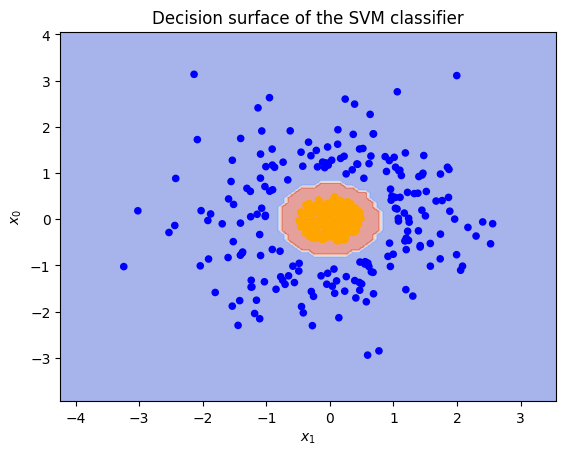

In [34]:
# Plot the decision surface of the SVM using utils.lib.plot_decision_surface
plot_decision_surface(X_test, y_test, clf)

## Decision Tree 

In [35]:
# Perform the train/test split and save the new dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
# Create a decision tree classifier and train it over the data
# Perform inference over the test set
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [37]:
# Compute the accuracy
accuracy_score(y_test, y_pred)

0.9925

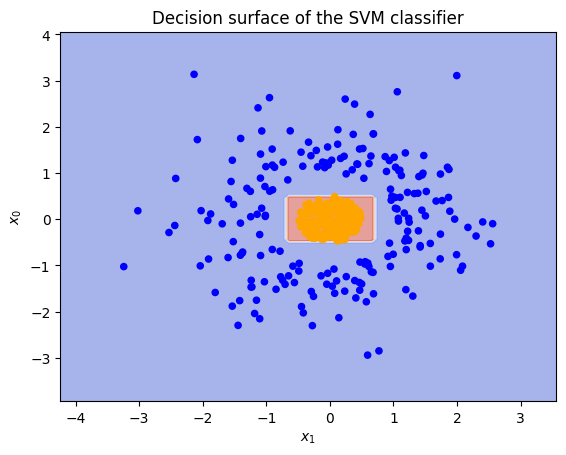

In [38]:
# Plot the decision surface
plot_decision_surface(X_test, y_test, clf)

Decision Trees are models which we can consider interpretable. It means that we can "look into" the model itself and understand how the decision function. In the case of decision trees, sklearn provides us with a nice utility to plot a trained tree to understanding the splitting rules. 

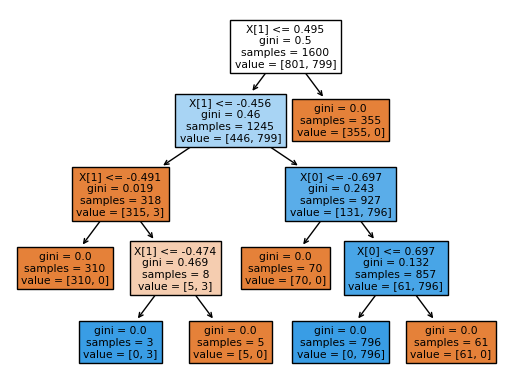

In [39]:
# Plot an interpretable version of the trained decision tree
from sklearn import tree
tree.plot_tree(clf, filled=True)
plt.show()

# Real Case: Glass Identification

Let us examine a real-world dataset called "Glass Identification Dataset" [1]. It consists of 10 real-valued attributes (chemical components) and we are asked to predict the type of class of the examples (e.g., tableware, headlamp, etc.). Such analysis is extremely useful. For example, when examining evidence for a criminal trial.

In this exercise, we will transform this into a binary classification problem (one-vs-all). We want to identify if a piece of glass comes from "tableware" or not.

[1] https://archive.ics.uci.edu/ml/datasets/glass+identification

## Standard Machine Learning Workflow

1. Analyze your dataset and the task (e.g., understand data distribution, check for missing values, etc.)
1. Preprocess your dataset (e.g., input missing values, standardize, etc.)
1. Choose a suitable model (e.g., decision tree, SVM, neural network, etc.)
1. Train your model (hyperparameter tuning)
1. Evaluate your model 

In [40]:
# Import the dataset data/glass.csv using pandas
# Print some information about the dataset
import pandas as pd

data = pd.read_csv("data/glass.csv")
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.042056
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.201188
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [41]:
# Separate the target variable (Y) from the features X
Y = data["type"]
X = data.drop(columns=["type"])

In [42]:
# Perfom the train test split over this dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=66)

In [43]:
# We standardize our data (remove the mean, divide by the std). This is done by only looking at the train set.
# We can also standardize the test set by using the mean/std coming from the train set.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Train a linear SVM and perform inference
from sklearn.svm import SVC

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [45]:
# Computer the accuracy
accuracy_score(y_test, y_pred)

0.9538461538461539

Great! The accuracy of our model is very high. It is more or less what we want. However, how do we know that our model is doing well? Visual inspection is not possible anymore, since we have a higher dimensional problem. Therefore, we need to resort to additional metrics with a higher "explanatory" power.

$F_1$ is defined as the harmonic mean of the precision and recall. It is a metric which measures the test's accuracy.

$$
    \begin{gather}
    F_1 = 2 \cdot \dfrac{(precision \cdot recall)}{(precision + recall)} \\[1.5em]
    precision = \frac{TP}{TP+FP} \qquad recall = \frac{TP}{TP+FN}
    \end{gather}
$$

In [46]:
# Compute the F1 score
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(y_pred,y_test))

F1 Score:  0.0


The $F_1$ score is really bad. Let us check more in detail what is happening with our model.

In [47]:
# Compute the precision and recall 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       0.00      0.00      0.00         3

    accuracy                           0.95        65
   macro avg       0.48      0.50      0.49        65
weighted avg       0.91      0.95      0.93        65



This report is kind of useful, but the **confusion matrix** can give us a better picture

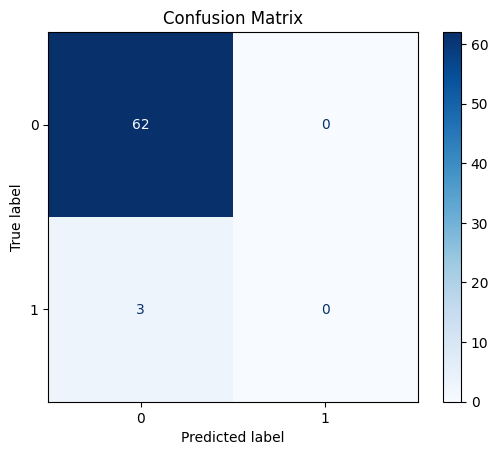

In [48]:
# Plot the confusion matrix of the classifier
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

As we can see, the model is able to predict correctly all the instances of class $0$. However, it is very bad in classifying instances of the class $1$. 

In [49]:
# Print the class predicted by the model on the test set
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [50]:
# Compute the target class distribution in the train dataset (y_train)
y_train.value_counts()

0    143
1      6
Name: type, dtype: int64

Recall the standard formulation of a soft-margin SVM. The regularization parameter $C$ trade-offs the data fitting with the size of the margin. In the standard case, $C$ is the same for all the classes, which means that the misclassification penalty is the same for every class.
$$
\min_{\mathbb{w}, w_0, \zeta} = ||\mathbf{w}||^2 + C \sum_{i=0}^N \zeta_i
$$

In our case, since we are dealing with an unbalanced dataset, we want to give a higher penalty if we misclassify an example coming from the minority class. Therefore, the formulation becomes:

$$
\min_{\mathbb{w}, w_0, \zeta} = ||\mathbf{w}||^2 + \sum_{i=0}^N \zeta_i \cdot (\mathbb{I}[y_i = 1]C_{1}+\mathbb{I}[y_i = 0]C_{0})
$$

where $C_{0}$ and $C_{1}$ indicates the penalties associated to the two classes. $\mathbb{I}$ is the indicator function.


In [51]:
# Train a balanced SVM and perform inference over the test set
from sklearn.svm import SVC

# The parameter "balanced" enable us to re-weight each class penalties by looking
# at their numerosity in the training set.
clf = SVC(kernel="linear", class_weight = "balanced")

# Training
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

In [52]:
# Compute the F1 score
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(y_pred,y_test))

F1 Score:  0.8


In [53]:
# Compute the precision and recall 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.67      0.80         3

    accuracy                           0.98        65
   macro avg       0.99      0.83      0.90        65
weighted avg       0.98      0.98      0.98        65



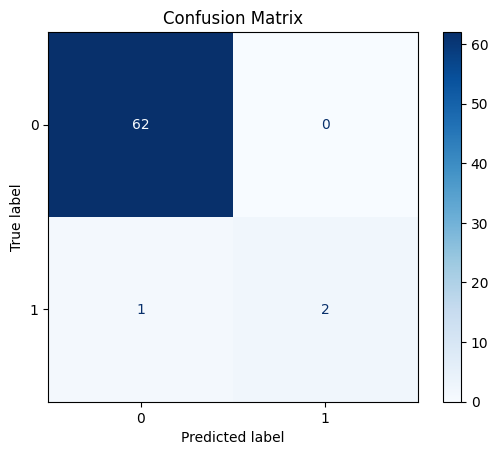

In [54]:
# Plot the confusion matrix of the classifier
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# K-fold Cross Validation

In real word, we do not have a separate test set we can evaluate on. We need a way to evaluate our model and obtain a reasonable estimate about its predictive quality once sent to production.

Suppose we have a dataset such as this one:
<br><br>
<img src="./img/kfold/1.png" style="width: 400px;"/>
<br><br>
<br><br>
<img src="./img/kfold/2.png" style="width: 400px;"/>
<br><br>

Generally, we use the train set to train our model. Then, we evaluate on the test set. However, in real life, we do not have a test set which is representative of the real distribution the model will have to work on once deployed.

<br><br>
<img src="img/kfold/3.png" style="width: 400px;"/>
<br><br>

What can we do? We could split again the train set and obtain a **validation set** we could use for the evaluation. Basically, we forget that the test dataset exists and we use it only at the end.  

<br><br>
<img src="img/kfold/4.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/5.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/6.png" style="width: 400px;"/>
<br><br>

However, why should we limit ourselves to a single validation dataset? We can take "multiple" validation datasets and compute an average of the performance of our model. 

<br><br>
<img src="img/kfold/7.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/8.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/9.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/10.png" style="width: 400px;"/>
<br><br>


In [55]:
# Perform 5-fold cross-validation on an SVM classifier.
# Use as scoring metric the F1
# Save the F1 values for each split into a list
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_train, X_test_secret, y_train, y_test_secret = train_test_split(X, Y, test_size=0.2, random_state=42)

clf = SVC(kernel="linear", class_weight="balanced")

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=kf.split(X_train, y_train), scoring="f1")

In [56]:
# Print the k-fold scores and their mean
print("K-Fold F1-Scores: ", scores)
print(f"Mean F1-Scores {np.mean(scores):.2f}+/-{np.std(scores):.2f}")

K-Fold F1-Scores:  [0.5 0.5 0.4 0.5 0.4]
Mean F1-Scores 0.46+/-0.05


In [57]:
# Train an SVM model using the entire training dataset.
clf = SVC(kernel="linear", class_weight="balanced")
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test_secret)

In [58]:
# Compute the final F1 score
print(f1_score(y_pred,y_test_secret))

0.4


# Dimensionality Reduction

## Real Dataset: Wine Dataset

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines [1].

[1] https://archive.ics.uci.edu/ml/datasets/wine

In [67]:
df_wine = pd.read_csv("data/wine.csv")
df_wine.describe()

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [68]:
# Separate the data into target and features
y = df_wine["type"]
X = df_wine.drop(columns=["type"])

In [69]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [70]:
# Initialize a PCA object and transform the data
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

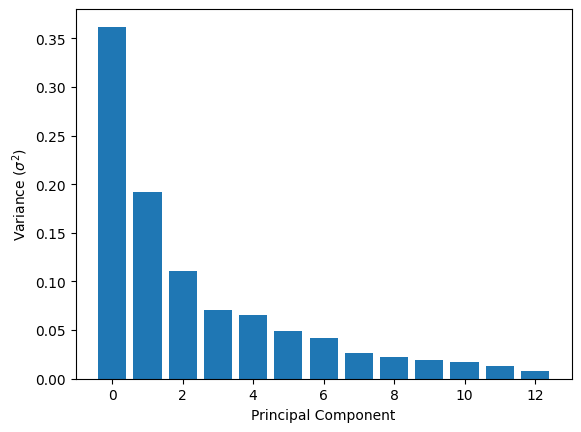

In [71]:
# Plot the explained variace ratio for each component
percent_variance = pca.explained_variance_ratio_
plt.bar(np.arange(len(percent_variance)), height=percent_variance)
plt.ylabel("Variance ($\sigma^2$)")
plt.xlabel("Principal Component")
plt.show()

The point of inflexion (where the line starts to bend) should indicate how many components have to be retained. In this case, the magic number is 3

### PCA (2-dimensions)

In [72]:
# Initialize a PCA object (2 components) and transform data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

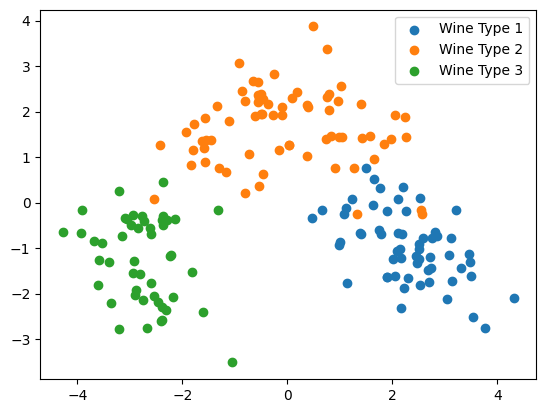

In [73]:
# Plot the data by using the utils.lib.plot_pca_clusters function
%matplotlib inline
from utils.lib import plot_pca_clusters
plot_pca_clusters(X_pca, y)

### PCA (3-dimensions)

In [74]:
# Initialize a PCA object (3 components) and transform data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

<IPython.core.display.Javascript object>


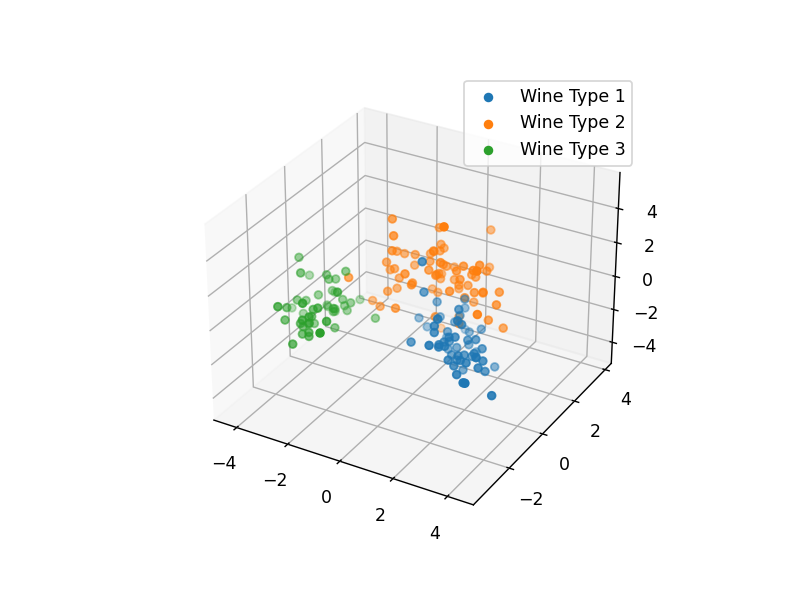

In [75]:
# Plot the data by using the utils.lib.plot_pca_clusters function
%matplotlib notebook
plot_pca_clusters(X_pca, y, True)